In [1]:
# 2.1.


import numpy as np
import numpy.linalg as lg


def householder_vector(a: np.array, e: np.array) -> np.array:
    l = np.sign(a[0]) * lg.norm(a) / lg.norm(e)
    l = np.asscalar(l)
    v = a - l * e
    
    return v / lg.norm(v)


In [2]:
# 2.2.


from typing import Tuple


def householder_matrix(a: np.array, e: np.array) -> np.array:
    v = householder_vector(a, e)
    
    return np.identity(a.shape[0]) - 2 * np.outer(v, v)


def householder_angle(A: np.array) -> Tuple[np.array, np.array]:
    a = A[:, 0]
    e = np.zeros(a.shape[0])
    e[0] = 1
    
    return a, e


def qr_decomposition(A: np.array) -> Tuple[np.array, np.array]:
    m, n = A.shape
    Q = np.identity(m)
    R = A
    for i in range(n if m > n else n - 1):
        Hm = householder_matrix(*householder_angle(R[i:, i:]))
        H = np.identity(m)
        H[i:, i:] = Hm
        Q = H @ Q
        R = H @ R

    return Q.T, R


In [3]:
# 2.3.


def solve(A: np.array, b: np.array) -> np.array:
    n = A.shape[0]
    x = np.empty(n)
    for i in range(n - 1, -1, -1):
        shift = A[i][i + 1:] @ x[i + 1:]
        x[i] = (b[i] - shift) / A[i][i]
    
    return x


In [4]:
# 2.4.


def solve_lznk(A: np.array, b: np.array) -> np.array:
    Q, R = qr_decomposition(A)
    n = R.shape[1]
    R = R[:n]
    Q = Q.T[:n]
    return solve(R, Q @ b)


In [5]:
# 2.5.


from typing import List


def qr_vector_list(A: np.array) -> Tuple[List[np.array], np.array]:
    m, n = A.shape
    q = []
    R = A
    for i in range(n if m > n else n - 1):
        v = householder_vector(*householder_angle(R[i:, i:]))
        q.append(v)
        H = np.identity(m)
        H[i:, i:] -= 2 * np.outer(v, v)
        R = H @ R

    return q, R


In [6]:
# 2.6.


def solve_lznk_mod(A: np.array, b: np.array) -> np.array:
    q, R = qr_vector_list(A)
    n = R.shape[1]
    b_mod = np.asfarray(b)
    i = 0
    for v in q:
        b_mod[i:] -= v @ b_mod[i:] * 2 * v
        i += 1
    
    return solve(R[:n], b_mod[:n])


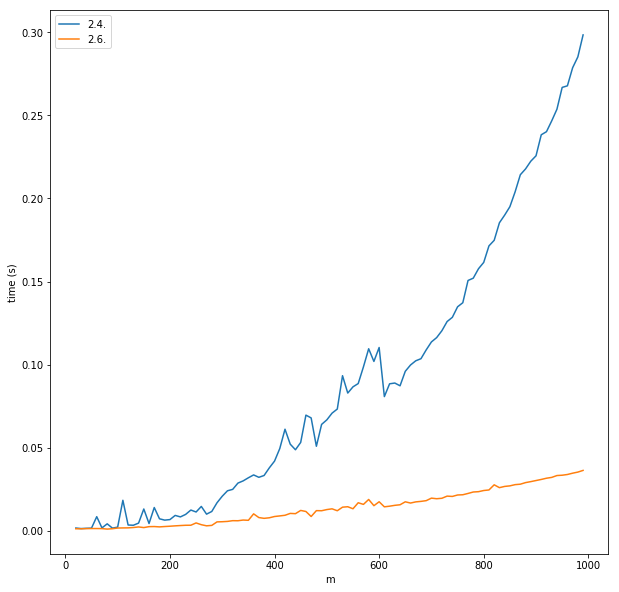

In [8]:
# 2.7.


from time import time
from typing import Callable
import matplotlib.pyplot as plt


def measure_time(f: Callable[[np.array, np.array], np.array],
                 A: np.array, b: np.array,
                 results: List[float]) -> None:
    start = time()
    f(A, b)
    finish = time()
    results.append(finish - start)


matrix_time = []
vector_time = []

x_axis = range(20, 1000, 10)
for m in x_axis:
    A = np.random.rand(m, 5)
    b = np.random.rand(m)
    measure_time(solve_lznk, A, b, matrix_time)
    measure_time(solve_lznk_mod, A, b, vector_time)

plt.figure(figsize=(10, 10))
plt.plot(x_axis, matrix_time)
plt.plot(x_axis, vector_time)
plt.legend(["2.4.", "2.6."])
plt.xlabel("m")
plt.ylabel("time (s)")
plt.show()
